In [4]:
import tensorflow as tf

In [3]:
w = [[1,2,3],[4,5,6],[7,8,9]]
x = [[1],[2],[3]]

W = tf.Variable(w, "int32")
X = tf.Variable(x, "int32")


y = tf.matmul(W,x)
print (y)

Tensor("MatMul:0", shape=(3, 1), dtype=int32)


In [4]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    result = sess.run(y)
print (result)

[[14]
 [32]
 [50]]


In [5]:
w = [[1,2,3],[4,5,6],[7,8,9]]
x0 = [[1],[2],[3]]
x1 = [[0],[0],[0]]
x2 = [[1],[1],[1]]
vectors =[x0,x1,x2]

W = tf.Variable(w, "int32")
x_ph = tf.placeholder("int32", [3,1])

y2 = tf.matmul(W, x_ph)

result_list = []
with tf.Session() as sess2:
    sess2.run(tf.initialize_all_variables())
    for v in vectors:
        result_list.append(sess2.run(y2,feed_dict={x_ph: v}))

print ("{},{},{}".format(*result_list))

[[14]
 [32]
 [50]],[[0]
 [0]
 [0]],[[ 6]
 [15]
 [24]]


### 学習内容 ###
- ねこ　ー＞　にゃーん
- いぬ　ー＞　わんわん
- うさぎ　ー＞　・・・。

を学習させる。


In [6]:
cat = [[1.],[0.],[0.]]
dog = [[0.],[1.],[0.]]
rabbit= [[0.],[0.],[1.]]

nyan =  [[1.],[0.],[0.]]
wan =  [[0.],[1.],[0.]]
silent = [[0.],[0.],[1.]]

data_set = [(cat,nyan)]*500 +[(dog,wan)]*500+[(rabbit, silent)]*500
data_set
import random
random.shuffle(data_set)

In [7]:
w = [[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]
W = tf.Variable(w, "float")
x = tf.placeholder(tf.float32, [3,1])
y = tf.matmul(W,x)
y_ = tf.placeholder(tf.float32, [3,1])

cost = tf.reduce_sum(tf.pow(y - y_, 2))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(len(data_set)):
        sess.run(train_step, feed_dict={x: data_set[i][0], y_: data_set[i][1]})
        if i % 100 == 0:
            error = sess.run(cost,feed_dict={x: data_set[i][0], y_: data_set[i][1]})
            print ("{}回目のエラー関数の値: {}".format(i,error))
    w_result = sess.run(W)


0回目のエラー関数の値: 0.9604000449180603
100回目のエラー関数の値: 0.24312268197536469
200回目のエラー関数の値: 0.06154582276940346
300回目のエラー関数の値: 0.0168914757668972
400回目のエラー関数の値: 0.004276030231267214
500回目のエラー関数の値: 0.0009209252893924713
600回目のエラー関数の値: 0.00021503098832909018
700回目のエラー関数の値: 5.4434622143162414e-05
800回目のエラー関数の値: 1.1723699572030455e-05
900回目のエラー関数の値: 1.1723699572030455e-05
1000回目のエラー関数の値: 1.754865138536843e-06
1100回目のエラー関数の値: 2.9659747724508634e-07
1200回目のエラー関数の値: 1.4927196900771378e-07
1300回目のエラー関数の値: 2.7279302372562597e-08
1400回目のエラー関数の値: 6.923585260665277e-09


In [8]:
import numpy as np

np.dot(w_result, cat)

array([[ 0.99995899],
       [ 0.        ],
       [ 0.        ]])

In [9]:
np.dot(w_result, dog)

array([[ 0.        ],
       [ 0.99995899],
       [ 0.        ]])

In [10]:
np.dot(w_result, rabbit)

array([[ 0.        ],
       [ 0.        ],
       [ 0.99995899]])

In [11]:
print(w_result)

[[ 0.99995899  0.          0.        ]
 [ 0.          0.99995899  0.        ]
 [ 0.          0.          0.99995899]]


### 学習内容 ###
- サイン　ー＞　sin関数の図を出す
- コサイン　ー＞　cos関数の図を出す
- タンジェント　ー＞　tan関数の図を出す

を学習させる。

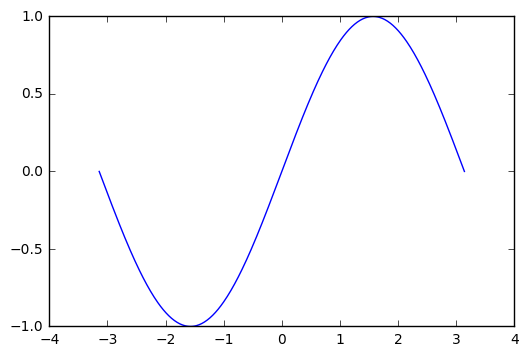

In [12]:
%matplotlib inline
import matplotlib.pylab as plt
x = np.linspace(-np.pi, np.pi, 400)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [13]:
import random
import numpy as np
x_data = np.linspace(-np.pi, np.pi, 400)

sin = [[1.],[0.],[0.]]
cos = [[0.],[1.],[0.]]
tan = [[0.],[0.],[1.]]


sin_r = np.reshape(np.sin(x_data),(400,1))
cos_r = np.reshape(np.cos(x_data),(400,1))
tan_r = np.reshape(np.tan(x_data),(400,1))

data_set = [(sin, sin_r)]*50 +[(cos ,cos_r)]*50+[(tan, tan_r)]*50
random.shuffle(data_set)

In [14]:
w = tf.zeros([400,3])
W = tf.Variable(w, "float")
x = tf.placeholder(tf.float32, [3,1])
y = tf.matmul(W,x)
y_ = tf.placeholder(tf.float32, [400,1])

cost = tf.reduce_sum(tf.pow(y - y_, 2))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(len(data_set)):
        sess.run(train_step, feed_dict={x: data_set[i][0], y_: data_set[i][1]})
        if i % 100 == 0:
            error = sess.run(cost,feed_dict={x: data_set[i][0], y_: data_set[i][1]})
            print ("{}回目のエラー関数の値: {}".format(i,error))
    w_result = sess.run(W)

0回目のエラー関数の値: 191.59979248046875
100回目のエラー関数の値: 50.50286865234375


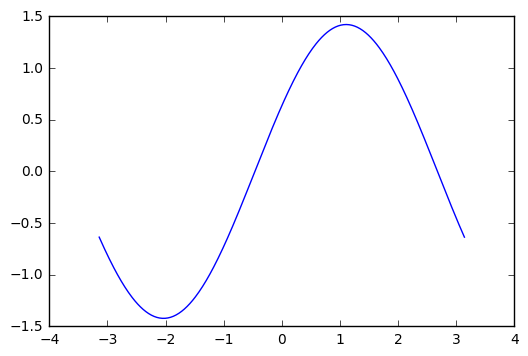

In [15]:
input =  [[2.0],[1.0],[.0]]
y_r = np.dot(w_result, input).flatten()
plt.plot(x_data, y_r)
plt.show()

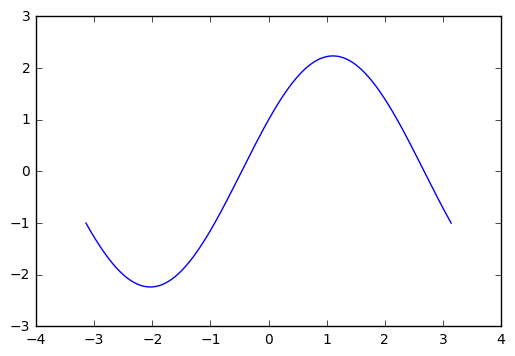

In [16]:
plt.plot(x_data, np.cos(x_data)+2*np.sin(x_data))
plt.show()

In [15]:
import random
import numpy as np
import tensorflow as tf

dim = 1000
base_num = 100
batch_size = 50
x_data = np.linspace(-np.pi, np.pi, dim)

bases = []
data_set =[]
for i in range(base_num):
    zero_v = np.zeros(base_num)
    zero_v[i] = 1.0
    bases.append(zero_v.flatten())
    
for i in range(0, base_num,2):
    sin_r = np.sin(i/2 * x_data).flatten()
    cos_r = np.cos(i/2 * x_data).flatten()
    data_set += [(cos_r, bases[i], "cos({}x)".format(i/2)), (sin_r,bases[i+1],"sin({}x)".format(i/2))] 
data_set = data_set *10000
random.shuffle(data_set)

def make_batch(data_set, size):
    input_list = []
    acc_list = []
    batch = []
    batch_acc = []
    for i in range(len(data_set)):
        batch.append(data_set[i][0])
        batch_acc.append(data_set[i][1])
        if len(batch) == size:
            input_list.append(batch)
            acc_list.append(batch_acc)
            batch = []
            batch_acc = []
    return input_list, acc_list

input_list , acc_list = make_batch(data_set, batch_size)
len(input_list)

20000

In [16]:
#W = tf.Variable(tf.zeros([dim, base_num]), tf.float32)
#b = tf.Variable(tf.ones(base_num), tf.float32)
hidden_num1 = 1000
hidden_num2 = base_num

y_ = tf.placeholder(tf.float32, [None, base_num])
x = tf.placeholder(tf.float32, [None, dim])

  
weights1 = tf.Variable(tf.truncated_normal([dim, hidden_num1], stddev=0.0001))
biases1 = tf.Variable(tf.ones([hidden_num1]))
hidden_layer_1 = tf.nn.relu(tf.matmul(x, weights1) + biases1)




weights2 = tf.Variable(tf.truncated_normal([hidden_num1, hidden_num2], stddev=0.0001))
biases2 = tf.Variable(tf.ones([hidden_num2]))
#hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights2) + biases2)
y = tf.nn.softmax(tf.matmul(hidden_layer_1, weights2) + biases2)

#dropout = tf.nn.dropout(hidden_layer_2, 1.0)


#weights3 = tf.Variable(tf.truncated_normal([hidden_num2, base_num], stddev=0.0001))
#biases3 = tf.Variable(tf.ones([base_num]))
#y = tf.nn.softmax(tf.matmul(dropout, weights3) + biases3)



#y= tf.nn.softmax(tf.matmul(x, W)+b)



cost = -tf.reduce_sum(y_ * tf.log(tf.clip_by_value(y,1e-1000, 1.0)))
train_step = tf.train.AdamOptimizer(0.0001).minimize(cost)


sess = tf.Session()
sess.run(tf.initialize_all_variables())
for index, (inp,acc) in enumerate(zip(input_list, acc_list)):
    feed_dict={x: inp, y_: acc}
    sess.run([train_step], feed_dict=feed_dict)
    if  index % 1000 == 0:
        error = sess.run(cost, feed_dict=feed_dict)
        print ("{}回目のエラー関数の値: {}".format(index, error))

0回目のエラー関数の値: 224.34698486328125
1000回目のエラー関数の値: 1.2337945699691772
2000回目のエラー関数の値: 0.11010652780532837
3000回目のエラー関数の値: 0.17185920476913452
4000回目のエラー関数の値: 0.07595784217119217
5000回目のエラー関数の値: 0.037715427577495575
6000回目のエラー関数の値: 0.00443860050290823
7000回目のエラー関数の値: 0.0024443278089165688
8000回目のエラー関数の値: 0.0013401689939200878
9000回目のエラー関数の値: 0.004399923607707024
10000回目のエラー関数の値: 0.0003749146417248994
11000回目のエラー関数の値: 0.00016188649169635028
12000回目のエラー関数の値: 0.00035914857289753854
13000回目のエラー関数の値: 4.947187699144706e-05
14000回目のエラー関数の値: 3.015995753230527e-05
15000回目のエラー関数の値: 6.079778177081607e-05
16000回目のエラー関数の値: 7.62939453125e-06
17000回目のエラー関数の値: 5.9604644775390625e-06
18000回目のエラー関数の値: 2.86102294921875e-06
19000回目のエラー関数の値: 3.099446303167497e-06


In [18]:
f = np.cos(2*x_data) + np.cos(x_data) + 1
y_res = sess.run(y, feed_dict={x: [f.flatten()]})

for coff in y_res[0]:
    if coff < 1.0e-5:
        coff = 0.0
    print(coff)

0.997929
0.00190272
0.000122546
0.0
4.63355e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


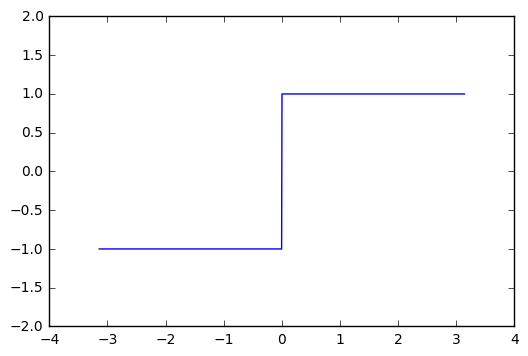

In [19]:
%matplotlib inline
import matplotlib.pylab as plt
step_func = np.piecewise(x_data, [x_data < 0, x_data >= 0], [-1, 1])
plt.plot(x_data, step_func)
plt.xlim(-4,4)
plt.ylim(-2,2)
plt.show()

In [107]:
f = step_func
y_res = sess.run(y, feed_dict={x: [f.flatten()]})

for coff in y_res[0]:
    print(coff)

5.17611e-15
1.45382e-29
4.497e-15
1.0
4.38432e-15
5.11195e-15
4.71161e-15
2.95455e-10
4.52624e-15
4.64744e-15
4.51949e-15
3.42866e-12
4.55807e-15
4.4219e-15
4.64965e-15
4.54745e-13
4.59589e-15
4.29457e-15
4.72918e-15
1.74985e-13
4.6657e-15
4.11401e-15
4.47827e-15
8.87635e-14
4.44878e-15
3.95224e-15
4.56155e-15
5.1783e-14
4.67644e-15
4.02859e-15
4.72679e-15
3.73071e-14
4.7311e-15
4.11542e-15
4.87584e-15
3.41319e-14
4.86546e-15
3.95627e-15
4.98603e-15
2.49655e-14
5.00663e-15
3.80922e-15
5.11193e-15
2.07462e-14
5.15161e-15
3.72685e-15
5.2705e-15
1.65339e-14
5.17274e-15
3.55174e-15
5.37248e-15
1.44167e-14
5.1203e-15
3.76665e-15
4.94097e-15
1.3815e-14
4.70518e-15
4.07841e-15
4.71776e-15
1.33192e-14
4.70674e-15
4.03361e-15
4.44139e-15
1.24193e-14
4.2724e-15
4.13167e-15
4.40459e-15
1.1631e-14
4.29054e-15
4.18215e-15
4.20121e-15
1.16471e-14
4.40486e-15
4.29383e-15
4.33e-15
1.09463e-14
4.24647e-15
4.33958e-15
4.29618e-15
1.00867e-14
4.20611e-15
4.44663e-15
4.21074e-15
9.86998e-15
4.36235e-15
4.